### Data preprocessing task done by Neha Chaudhari and Partha Vemuri

In [1]:
# loading the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer


In [3]:
# reading the train and test datasets
categorical_data = pd.read_excel("train_new/TRAIN_CATEGORICAL_METADATA_new.xlsx")
quantitative_data = pd.read_excel("train_new/TRAIN_QUANTITATIVE_METADATA_new.xlsx")
connectome_data = pd.read_csv("train_new/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
train_data = pd.read_excel("train_new/TRAINING_SOLUTIONS.xlsx")

categorical_test = pd.read_excel("test/TEST_CATEGORICAL.xlsx")
quantitative_test = pd.read_excel("test/TEST_QUANTITATIVE_METADATA.xlsx")
connectome_test = pd.read_csv("test/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")

# print(connectome_data)


In [9]:
# get summary statistics
print("Summary statistics for quantitatve metadata")
print(quantitative_data.describe().T)

Summary statistics for quantitatve metadata
                             count       mean        std    min        25%  \
EHQ_EHQ_Total               1200.0  59.514750  49.744631 -100.0  46.670000   
ColorVision_CV_Score        1190.0  13.419328   2.112830    0.0  14.000000   
APQ_P_APQ_P_CP              1201.0   3.819317   1.330348    2.0   3.000000   
APQ_P_APQ_P_ID              1201.0  13.337219   3.593562    5.0  11.000000   
APQ_P_APQ_P_INV             1201.0  39.767694   4.872729   23.0  36.000000   
APQ_P_APQ_P_OPD             1201.0  17.963364   3.333965    7.0  16.000000   
APQ_P_APQ_P_PM              1201.0  16.557036   5.146548    5.0  13.000000   
APQ_P_APQ_P_PP              1201.0  25.498751   3.053720   13.0  23.000000   
SDQ_SDQ_Conduct_Problems    1204.0   2.074751   2.022992    0.0   0.000000   
SDQ_SDQ_Difficulties_Total  1204.0  12.213455   6.517330    0.0   7.000000   
SDQ_SDQ_Emotional_Problems  1204.0   2.324751   2.166399    0.0   1.000000   
SDQ_SDQ_Externalizin

In [15]:

# imputing quantitative data using median
# quantitative_data = quantitative_data.fillna(quantitative_data.median(numeric_only=True))

# Separate participant_id
# participant_id = quantitative_data['participant_id']

# # Drop participant_id before imputation
# quant_data_num = quantitative_data.drop(columns=['participant_id'])

# # Applying KNN Imputer to handle missing values in the quantitative data
# imputer = KNNImputer(n_neighbors=5)
# quantitative_data = pd.DataFrame(imputer.fit_transform(quant_data_num), columns=quant_data_num.columns)

# # Adding participant_id back to succesfully merge the quantitative data later based on participant id
# quantitative_data['participant_id'] = participant_id.values

print(quantitative_data.isnull().sum())

# imputing categorial data using mode
# for col in categorical_data.columns:
#     if categorical_data[col].isnull().any():
#         categorical_data[col].fillna(categorical_data[col].mode()[0], inplace=True)

# print(categorical_data.isnull().sum())


EHQ_EHQ_Total                 0
ColorVision_CV_Score          0
APQ_P_APQ_P_CP                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
APQ_P_APQ_P_PM                0
APQ_P_APQ_P_PP                0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
MRI_Track_Age_at_Scan         0
participant_id                0
dtype: int64


In [ ]:
# handling connectcome data
print(connectome_data.isnull().sum())
print(connectome_data.info())

# summary statistics for connectcome data
print("Summary statistics for connectcome data")
print(connectome_data.describe().T)

# check for null values in the train data 
print(train_data.isnull().sum())

participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19901, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB
None
Summary statistics for connectcome data
                       count      mean       std       min       25%  \
0throw_1thcolumn      1213.0  0.185265  0.238481 -0.657053  0.028235   
0throw_2thcolumn      1213.0  0.583053  0.172632 -0.224815  0.495514   
0throw_3thcolumn      1213.0  0.439351  0.235019 -0.517318  0.286137   
0throw_4thcolumn      1213.0  0.450398  0.212111 -0.440235  0.314428   
0throw_5thcolumn      1213.0  0.584654  0.195918 -0.486239  0.486735   
...           

In [12]:
# merging the 4 train datasets
merged_data = categorical_data.merge(quantitative_data, on='participant_id', how='inner')
merged_data = merged_data.merge(connectome_data, on='participant_id', how='inner')
merged_data = merged_data.merge(train_data, on='participant_id', how='inner')

# print(merged_data)

# check for missing values in the merged dataset
merged_data.isnull().sum()

merged_data_clean = merged_data.dropna() # drop any missing values present in the dataset

# merged_data_clean.isnull().sum()
print("Shape after dropping missing values:", merged_data_clean.shape) # check the no. of rows and columns in the final dataset

# categorical_cols = merged_data_clean.select_dtypes(include='object').columns
# print(categorical_cols)


Shape after dropping missing values: (1213, 19930)


In [13]:
merged_data.info()
merged_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19930 entries, participant_id to Sex_F
dtypes: float64(19925), int64(4), object(1)
memory usage: 184.4+ MB


,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,EHQ_EHQ_Total,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,2017.652102,2.014839,0.420445,2.080791,2.293487,17.901072,24.892828,17.549876,32.955482,59.394935,...,-0.037423,0.009393,0.557159,0.376624,0.370711,0.500415,0.476418,0.543181,0.685078,0.342951
std,1.122522,1.135147,0.685525,3.164636,0.749873,3.501076,17.025899,3.904199,13.797498,49.542433,...,0.205052,0.198820,0.150605,0.197995,0.191249,0.177047,0.177732,0.170237,0.464676,0.474891
min,2015.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,0.000000,-100.000000,...,-0.584162,-0.605647,-0.052284,-0.359869,-0.553067,-0.302408,-0.307228,-0.224057,0.000000,0.000000
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,0.000000,15.000000,30.000000,46.670000,...,-0.187871,-0.124404,0.469147,0.262601,0.242569,0.389078,0.367971,0.442283,0.000000,0.000000
50%,2018.000000,1.000000,0.000000,0.000000,2.000000,18.000000,30.000000,18.000000,35.000000,76.670000,...,-0.044155,0.004375,0.573840,0.391739,0.388528,0.524508,0.496103,0.566455,1.000000,0.000000
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,45.000000,93.400000,...,0.104526,0.146865,0.666128,0.521904,0.505970,0.630443,0.600065,0.667402,1.000000,1.000000
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000,100.000000,...,0.630932,0.666169,0.889148,0.866371,0.828784,0.914021,0.898459,0.903364,1.000000,1.000000


### Exploratory Data Analysis

### 1. EDA for Quantitative Data

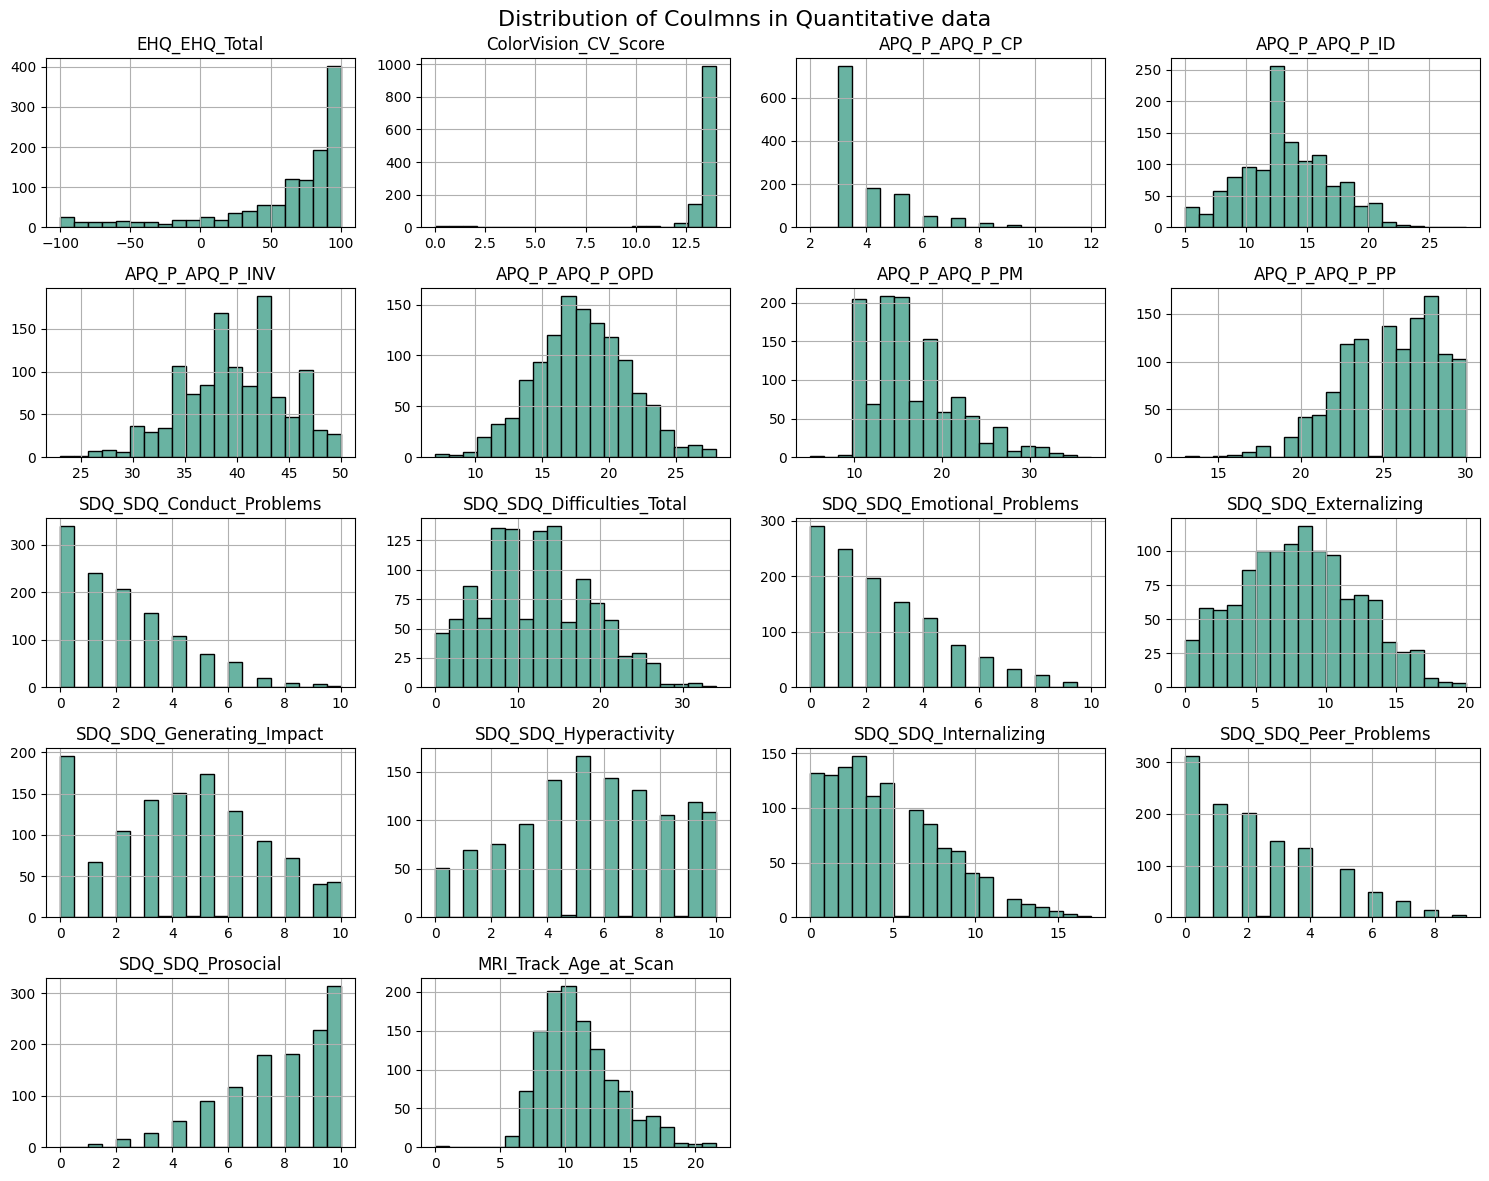

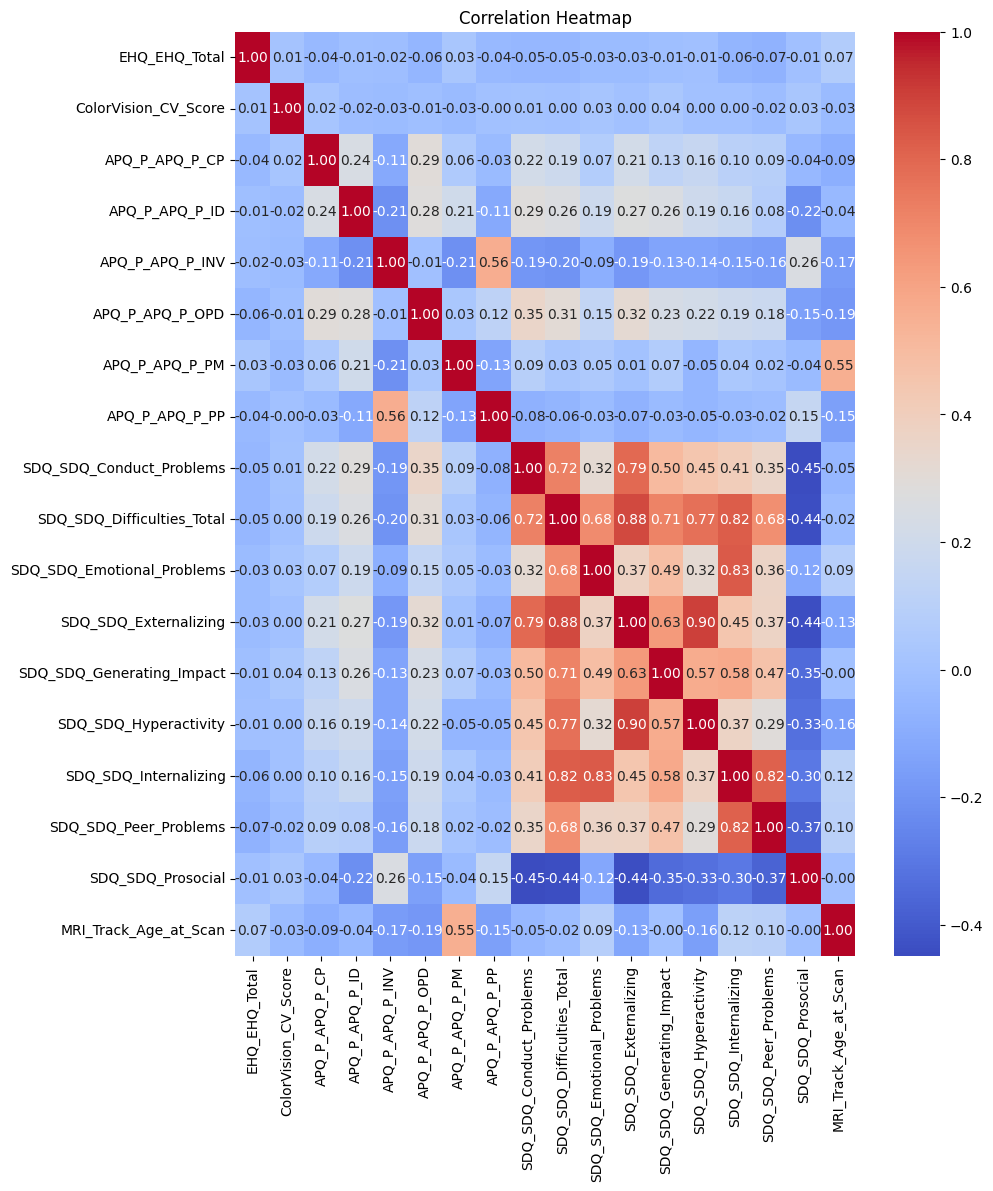

In [25]:
# plots for quant eda

# Creating histogram to understand the distribution of values in each variable individually
quantitative_data.hist(bins=20, color='#69b3a2', edgecolor='black', figsize=(15, 12))
plt.suptitle("Distribution of Coulmns in Quantitative data", fontsize=16)
plt.tight_layout()
plt.show()

# # corrrelation heatmap for quaantitative data
numeric_cols = quantitative_data.select_dtypes(include='number')
plt.figure(figsize=(10,12))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

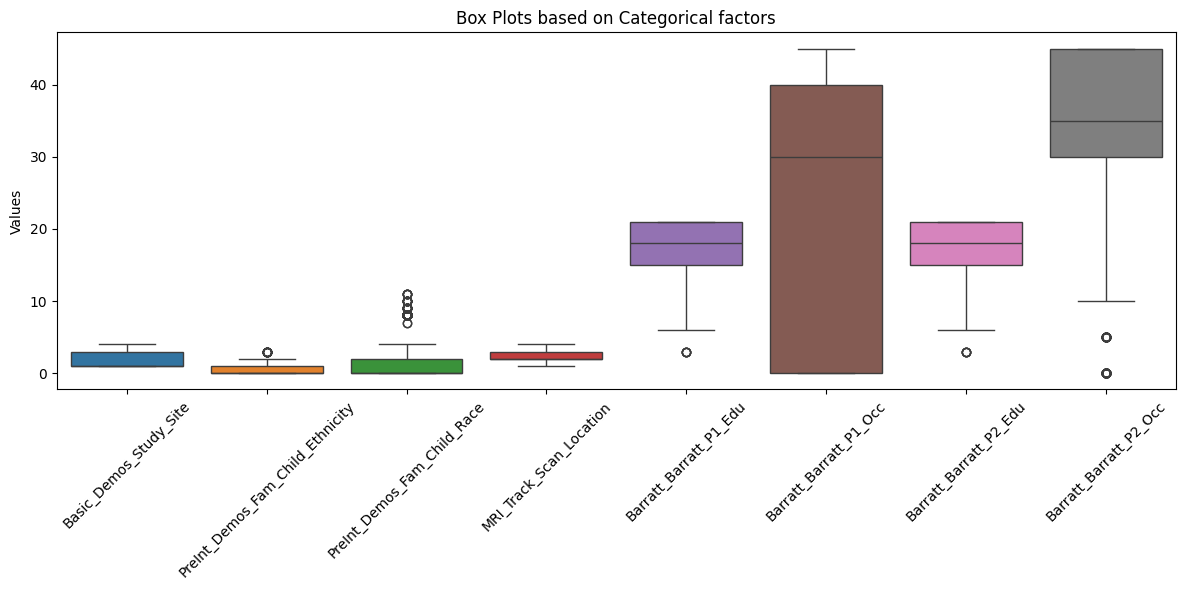

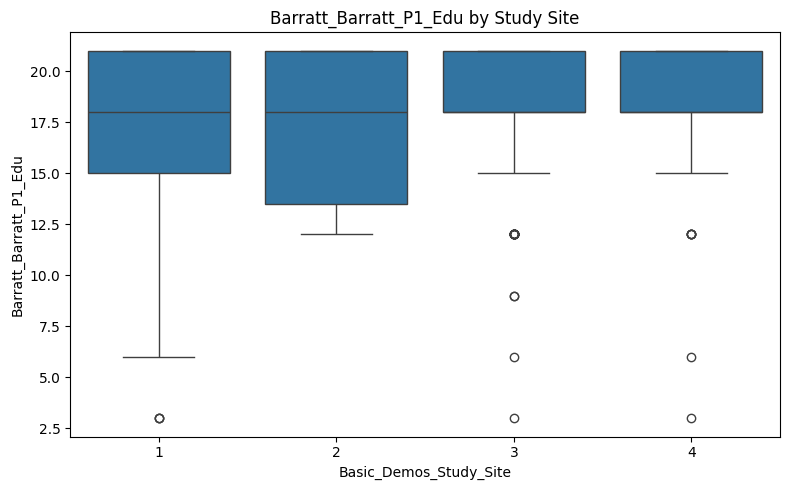

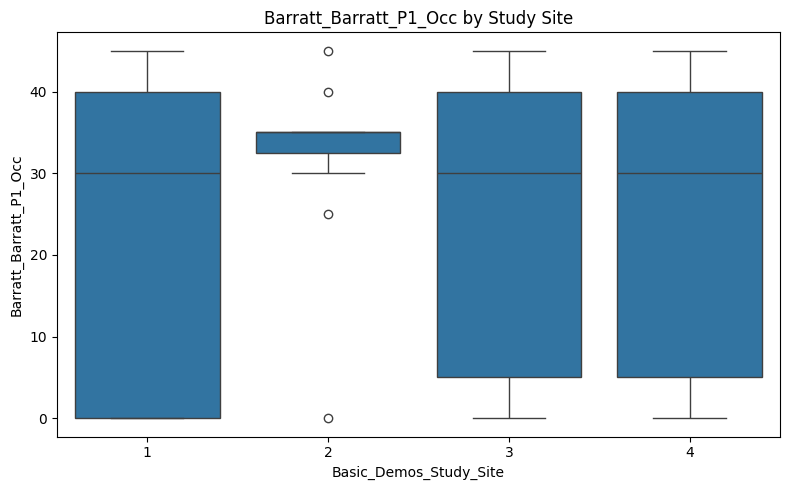

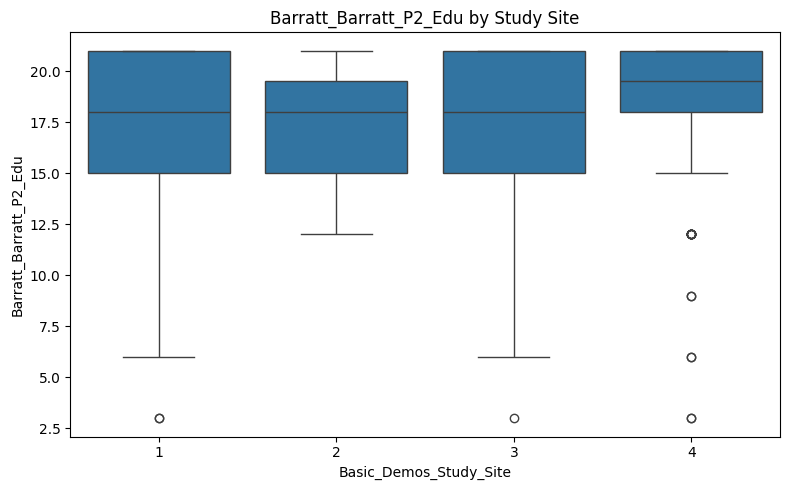

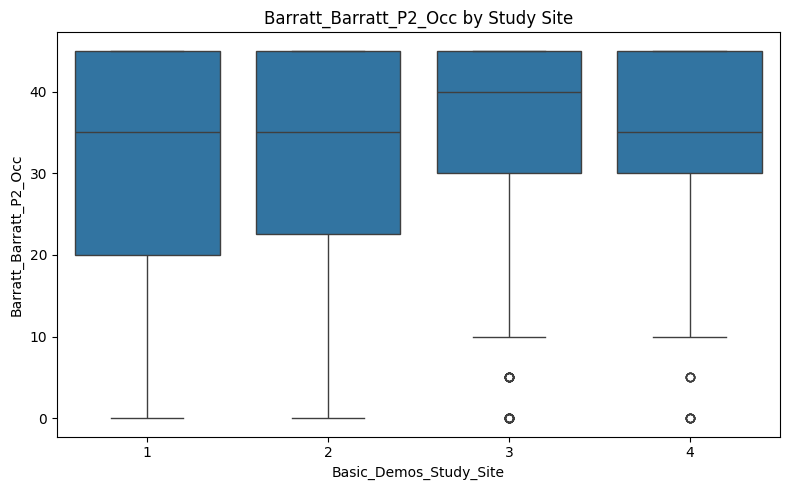

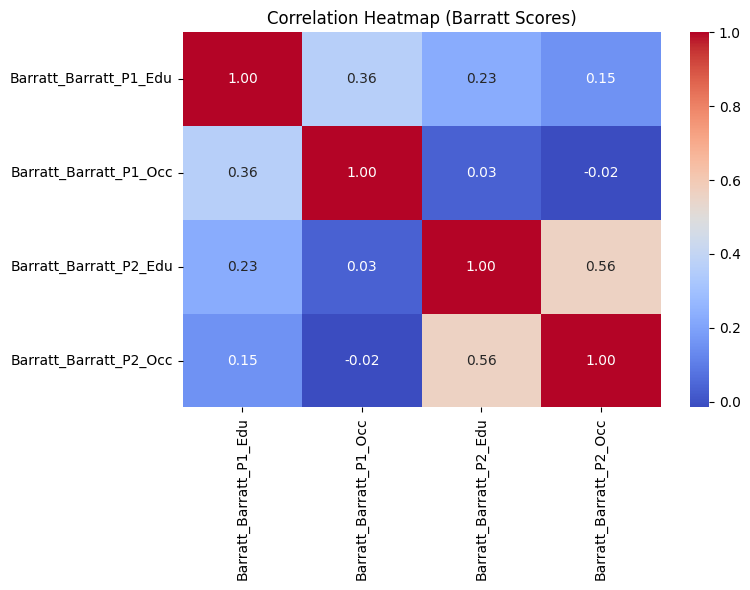

C:\Users\Neha\AppData\Local\Temp\ipykernel_13092\4291809497.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='PreInt_Demos_Fam_Child_Ethnicity', y='SDQ_SDQ_Hyperactivity', palette=sns.color_palette("husl", n_colors=merged_data['PreInt_Demos_Fam_Child_Ethnicity'].nunique()))


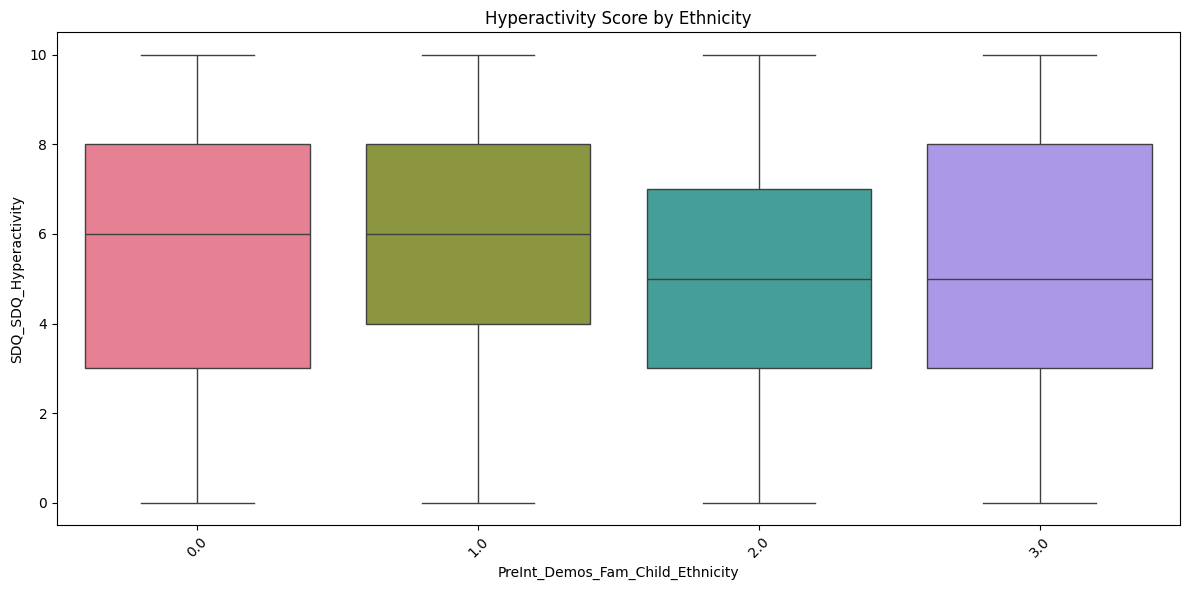

C:\Users\Neha\AppData\Local\Temp\ipykernel_13092\4291809497.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='Basic_Demos_Study_Site', y='SDQ_SDQ_Hyperactivity', palette='Set2')


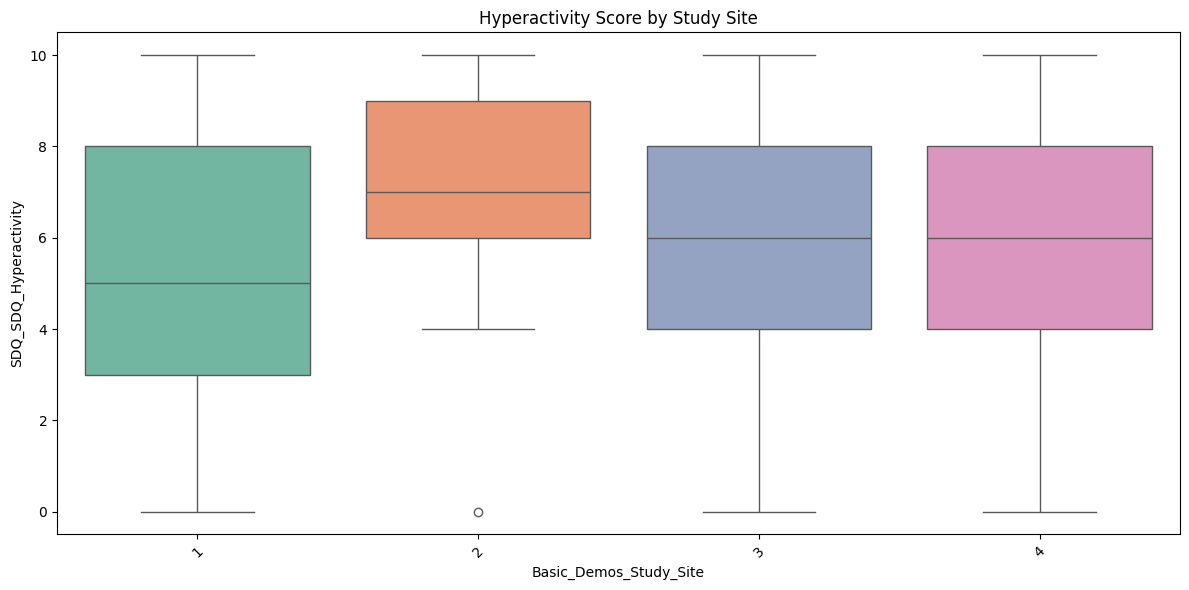

In [ ]:
# Create a box plot for all numeric columns(except year)
categorical_clean = categorical_data.select_dtypes(include=['float64', 'int64'])
categorical_clean = categorical_clean.drop('Basic_Demos_Enroll_Year', axis = 1) # keeping year skews the data highly since the year value is in 2000's

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data = categorical_clean)
plt.xticks(rotation=45)
plt.title("Box Plots based on Categorical factors")
plt.ylabel("Values")
plt.tight_layout()
plt.show()

# Separating the required numeric columns from the categorical daa 
numerical_columns = [
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ'
]

# Boxplots by Study Site for Scores
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Basic_Demos_Study_Site', y=col, data=categorical_data) # creating boxplot using seaborn library
    plt.title(f"{col} by Study Site")
    plt.tight_layout()
    plt.show()

# Correlation Heatmap for Score Features
plt.figure(figsize=(8, 6))
corr = categorical_data[numerical_columns].corr() # using only the numeric columns
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f") # Seaborn to create a heatmap of feature correlation
plt.title("Correlation Heatmap (Barratt Scores)")
plt.tight_layout()
plt.show()

# Boxplot: ADHD score vs. Ethnicity
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='PreInt_Demos_Fam_Child_Ethnicity', y='SDQ_SDQ_Hyperactivity')
plt.title('Hyperactivity Score by Ethnicity') # give appropriate plot title
plt.xticks(rotation=45) # rotate xlabels for better readability
plt.tight_layout()
plt.show()

# Boxplot: ADHD score vs. Study Site
plt.figure(figsize=(12, 6)) # set the figure size
sns.boxplot(data=merged_data, x='Basic_Demos_Study_Site', y='SDQ_SDQ_Hyperactivity') # give appropriate plot title
plt.title('Hyperactivity Score by Study Site') 
plt.xticks(rotation=45) # rotate xlabels for better readability
plt.tight_layout()
plt.show()


### 3. EDA on Train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB
None
               count      mean       std  min  25%  50%  75%  max
ADHD_Outcome  1213.0  0.685078  0.464676  0.0  0.0  1.0  1.0  1.0
Sex_F         1213.0  0.342951  0.474891  0.0  0.0  0.0  1.0  1.0


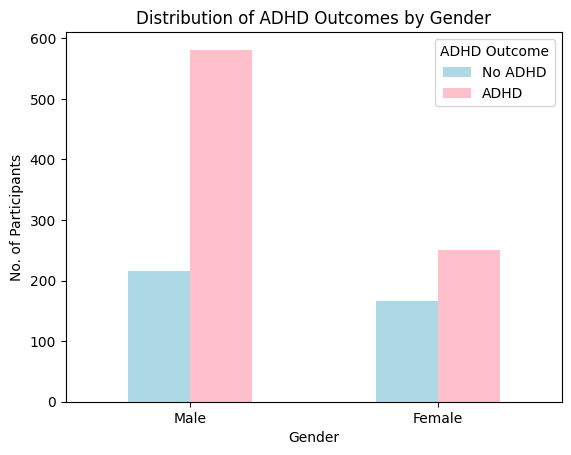

In [ ]:
 # print(train_data)
print(train_data.info()) # Check for object types

print(train_data.describe().T) # To get summary statistics on train data to understand it 

# histogram to see distribution of ADHD Outcomes by Gender
train_data_grouped = train_data.groupby(['Sex_F', 'ADHD_Outcome']).size().unstack(fill_value=0)
train_data_grouped.plot(kind='bar', stacked=False, color=['lightblue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('No. of Participants')
plt.title('Distribution of ADHD Outcomes by Gender')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.legend(['No ADHD', 'ADHD'], title='ADHD Outcome')